In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from scipy.io import loadmat

from nilearn.input_data import NiftiLabelsMasker
from nilearn import plotting, surface, datasets
import nibabel

from numpy.matlib import repmat

from utils.io import get_args

/opt/homebrew/Caskroom/miniforge/base/envs/accel/lib/python3.10/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
args = get_args()

In [3]:
shen_network_labels = loadmat('Shen_network_labels.mat')
network_mappings = shen_network_labels['Shen_network_labels'].flatten()
network_names = ['medialfrontal', 'frontalparietal', 'default', 'subcorticalcerebellar', 'motor', 'visual1', 'visual2', 'visualassociation']  # note the numbers have 7 and 6 flipped, but 6=V1 and 7=V2

In [4]:
shen_mask = NiftiLabelsMasker(args.atlas_loc)

_ = shen_mask.fit_transform(args.atlas_loc)

In [5]:
fsaverage = datasets.fetch_surf_fsaverage("fsaverage")

def vol_to_surf_to_map(img, filename=None, **plotting_kwargs):
    

    figure, axes = plt.subplots(2,2, subplot_kw={'projection': '3d'})
    for j, side in enumerate(['left', 'right']):
        bg_map = surface.load_surf_data(fsaverage[f"sulc_{side}"])
        for i, view in enumerate(['lateral', 'medial']):

            surf_data = surface.vol_to_surf(img,
                surf_mesh=fsaverage[f"pial_{side}"],
                inner_mesh=fsaverage[f"white_{side}"],
                interpolation='nearest'
            )

            fig = plotting.plot_surf_stat_map(
                fsaverage[f'pial_{side}'],
                surf_data,
                hemi=side,
                bg_map=bg_map,
                view=view,
                colorbar=False,
                axes=axes[i,j],
                **plotting_kwargs
            )

    plt.tight_layout()
    plt.subplots_adjust(
        wspace=-.35,
        hspace=-.25)
    if filename is not None:
        plt.savefig(f'results/figures/{filename}.png', bbox_inches="tight", dpi=400, transparent=True)
    plt.show()
    plt.close()

In [6]:
colors = ['blue', 'green', 'yellow', 'orange', 'red', 'purple']
ncolors = len(colors)
expanded_colors = (['gray'] * (ncolors+1)) + colors
cmap = ListedColormap(expanded_colors)

roi_nums = repmat(np.arange(1, ncolors+1), n=int(np.ceil(268/ncolors)), m=1)[0][:268]


shen_img = nibabel.load(shen_mask.labels_img)
shen_data = shen_img.get_fdata()
for i in range(1, 269):
    shen_data[shen_data==i] = roi_nums[i-1]

updated_shen_img = nibabel.Nifti1Image(shen_data, shen_img.affine, shen_img.header)

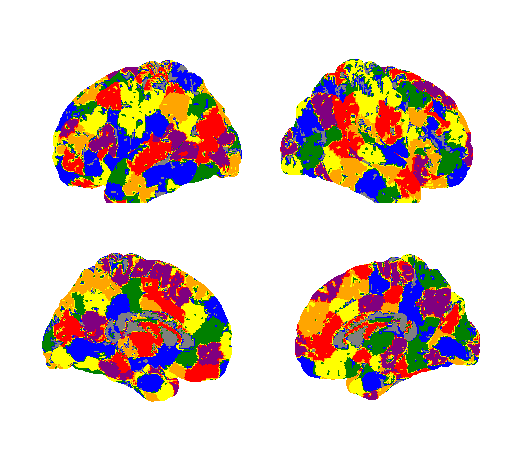

In [7]:
vol_to_surf_to_map(updated_shen_img, filename='shen_2mm_268_parcellation_surface_projected', cmap=cmap)

# Visualize networks

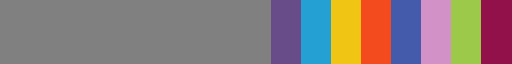

In [8]:
network_mappings
network_colors = [  # from Scheinost et al., 2016, IEEE Trans Biomed Eng
    (104/255, 75/255, 137/255), # medialfrontal
    (36/255, 160/255, 210/255), # frontalparietal
    (240/255, 197/255, 20/255), # default
    (243/255, 74/255, 30/255), # subcorticalcerebellar
    (68/255, 91/255, 171/255), # motor
    (157/255, 201/255, 75/255), # visual1
    (211/255, 146/255, 199/255), # visual2
    (147/255, 17/255, 74/255), # visualassociation
]

ncolors = len(network_colors)
expanded_colors = (['gray'] * (ncolors+1)) + network_colors
cmap = ListedColormap(expanded_colors)
cmap

In [9]:
network_mappings

array([2, 4, 3, 2, 3, 3, 2, 2, 2, 1, 4, 1, 3, 2, 4, 1, 2, 4, 2, 4, 2, 2,
       5, 5, 5, 5, 5, 4, 4, 2, 2, 4, 5, 5, 5, 4, 5, 5, 5, 5, 8, 6, 8, 4,
       5, 5, 2, 2, 3, 3, 5, 1, 1, 1, 2, 1, 1, 5, 8, 5, 5, 5, 5, 1, 1, 8,
       8, 6, 8, 2, 8, 6, 8, 8, 6, 7, 6, 7, 6, 6, 7, 6, 4, 5, 3, 3, 6, 4,
       5, 3, 4, 5, 4, 4, 4, 3, 5, 6, 4, 7, 4, 7, 4, 4, 4, 4, 4, 4, 5, 4,
       2, 2, 4, 4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 4, 4, 1, 3, 2, 1, 3, 2, 2, 4, 1, 4, 2, 1, 1, 1, 1, 4, 1, 2,
       4, 1, 2, 5, 5, 5, 5, 1, 5, 2, 1, 5, 5, 5, 4, 5, 5, 5, 5, 5, 8, 6,
       8, 4, 5, 5, 5, 2, 1, 2, 1, 1, 1, 5, 5, 1, 5, 1, 2, 1, 5, 2, 5, 6,
       2, 8, 8, 5, 3, 8, 6, 8, 6, 6, 8, 8, 6, 7, 7, 7, 6, 6, 4, 5, 1, 4,
       4, 3, 3, 4, 3, 4, 3, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 3, 8, 7, 2,
       4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4], dtype=uint8)

In [10]:
shen_img = nibabel.load(shen_mask.labels_img)
shen_data = shen_img.get_fdata()
for i in range(1, 269):
    shen_data[shen_data==i] = network_mappings[i-1]

updated_shen_img = nibabel.Nifti1Image(shen_data, shen_img.affine, shen_img.header)

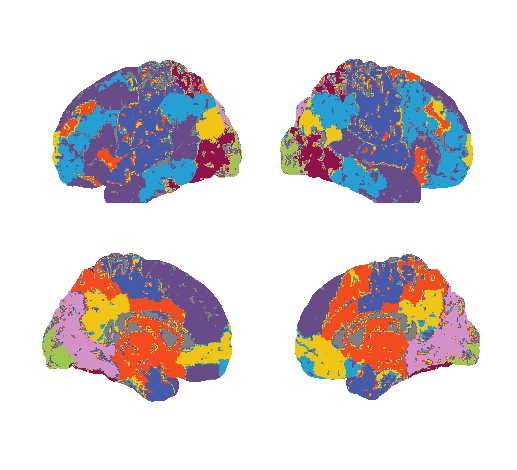

In [11]:
vol_to_surf_to_map(updated_shen_img, filename='shen_2mm_268_networks_surface_projected', cmap=cmap)